# Stock Market Price Prediction Using Linear Regression




## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns
from pandas_profiling import ProfileReport
import mplfinance as mpf

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

## Loading the Data

In [2]:
df =pd.read_csv('tatamo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7418 non-null   object 
 1   Open Price                 7418 non-null   float64
 2   High Price                 7418 non-null   float64
 3   Low Price                  7418 non-null   float64
 4   Close Price                7418 non-null   float64
 5   WAP                        7418 non-null   float64
 6   No.of Shares               7418 non-null   int64  
 7   No. of Trades              7418 non-null   int64  
 8   Total Turnover (Rs.)       7418 non-null   float64
 9   Deliverable Quantity       4792 non-null   float64
 10  % Deli. Qty to Traded Qty  4792 non-null   float64
 11  Spread High-Low            7418 non-null   float64
 12  Spread Close-Open          7418 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

## Data Preprocessing

In [3]:
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-06-11,346.45,352.90,344.75,350.75,349.506362,1605772,21014,5.612275e+08,336860.0,20.98,8.15,4.30
2021-06-10,345.65,347.85,342.50,344.60,345.174438,1154435,13105,3.984815e+08,202476.0,17.54,5.35,-1.05
2021-06-09,356.50,358.80,339.60,343.25,350.737299,4480912,59698,1.571623e+09,1345349.0,30.02,19.20,-13.25
2021-06-08,346.75,356.50,337.35,352.85,345.857260,3488224,48363,1.206428e+09,1422250.0,40.77,19.15,6.10
2021-06-07,338.55,351.00,338.55,345.50,346.270172,5575585,77740,1.930659e+09,2202934.0,39.51,12.45,6.95


In [4]:
df=df.iloc[::-1]
df['Target']=df['Close Price'].shift(periods=-1)
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
1991-01-02,175.0,182.5,175.0,182.50,0.0,0,0,0.0,NaN,NaN,7.5,7.50,182.50
1991-01-03,175.0,182.5,175.0,182.50,0.0,0,0,0.0,NaN,NaN,7.5,7.50,176.25
1991-01-07,170.0,177.5,167.5,176.25,0.0,0,0,0.0,NaN,NaN,10.0,6.25,171.25
1991-01-09,177.5,177.5,167.5,171.25,0.0,0,0,0.0,NaN,NaN,10.0,-6.25,175.00
1991-01-11,170.0,175.0,167.5,175.00,0.0,0,0,0.0,NaN,NaN,7.5,5.00,170.00


## Data Visualisation


#### Price Movement from the Data

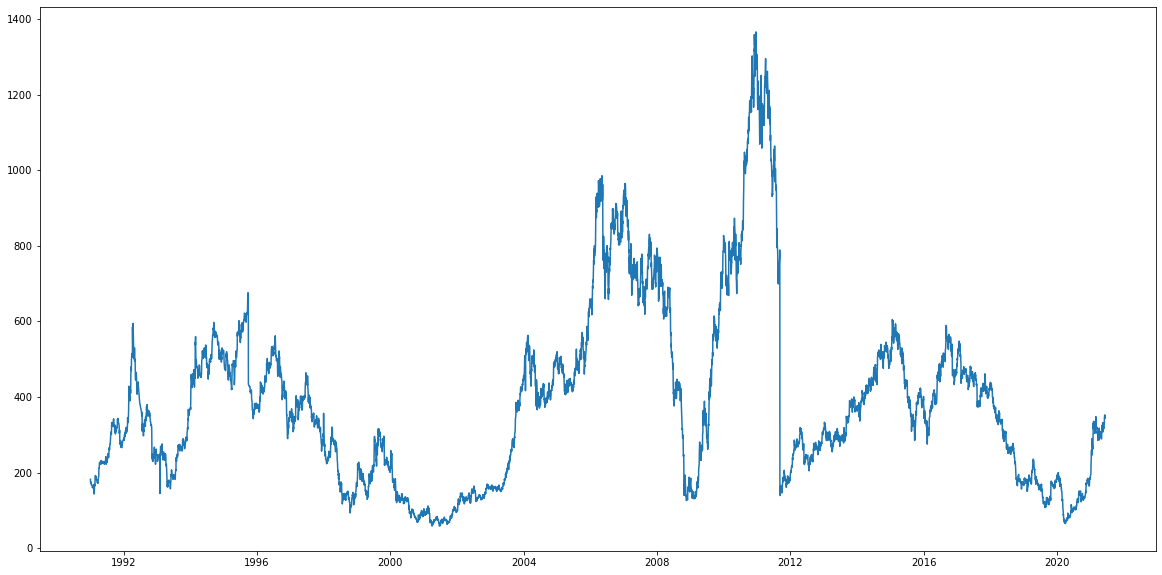

In [5]:
plt.plot(df.index,df['Target'])

#### Candlestick Chart of last 10 sessions

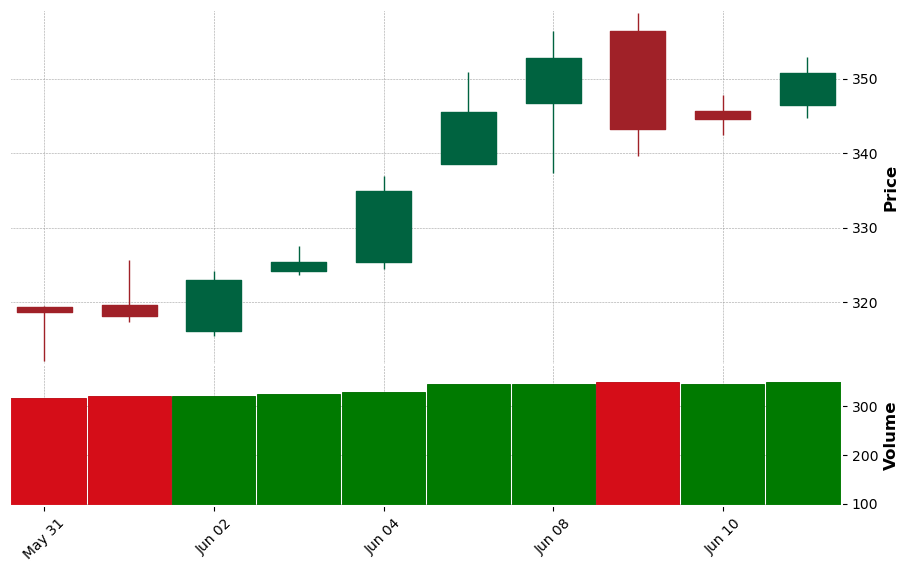

In [6]:
df.columns=['Open', 'High', 'Low', 'Close', 'Volume',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open','Target']

mpf.plot(df.tail(10),type='candle',volume=True,tight_layout=True,figratio=(20,12),title='',style='charles')

## Report about the data

In [7]:
profile=ProfileReport(df.drop('Target',axis='columns'),title="olhc Report",explorative=True)

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Cleaning

In [9]:
print(df.shape)
df_m=df
df_m=df_m.dropna()
df_m.shape

(7418, 13)


(4791, 13)

## Splitting the data

In [10]:
x_train,x_test,y_train,y_test=train_test_split(df_m.drop(['Target'],axis='columns'),df_m['Target'],test_size=0.3)

## Initialisation and Fitting the Model

In [11]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Evaluvation of Model



### Accuracy

In [12]:
model.score(x_test,y_test)

0.9977675052300853

### Root Mean Sqarued Error

In [13]:
pred_y=model.predict(x_test)
mean_squared_error(y_test,pred_y,squared=False)

12.472129080034378

### Mean Sqaured Error

In [14]:
mean_squared_error(y_test,pred_y)

155.55400378903917

### Mean absolute Error

In [15]:
mean_absolute_error(y_test,pred_y)

8.232793613323263

## Visualisation of Model




### Linear Regression Plot

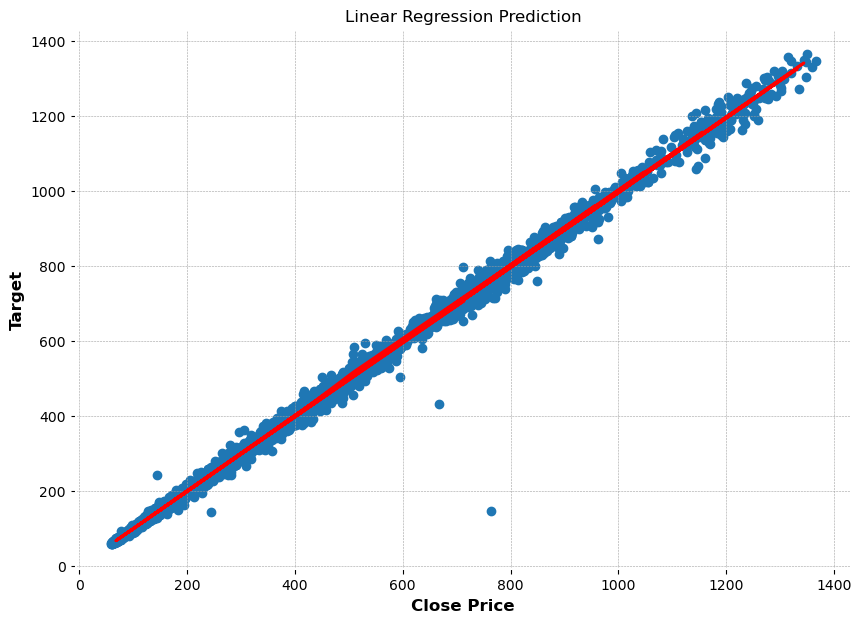

In [16]:
# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x=df['Close'], y=df['Target'])
plt.plot(x_test['Close'], model.predict(x_test), color='red')
plt.xlabel('Close Price')
plt.ylabel('Target')
plt.title('Linear Regression Prediction')
plt.show()

### Plot of difference of True values and Predicted Values

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
#Error Percentage of Each prediction
delta_y = (y_test-pred_y)/y_test*100
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),bw=5)
plt.show()

### Plotting the Predicted Values

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(pred_y), bw=5)
plt.show()

### Plotting the True Values

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test), bw=5)
plt.show()

### Predicted Values vs True Values

In [ ]:
plt.plot(pred_y,color='red', label='Predicted Values')
plt.plot(list(y_test),color='blue', label='True Values')
plt.legend(loc='upper left')
plt.show()

### Root Mean Squared Error of Training and Testing data




A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error.

In [ ]:
train_e=mean_squared_error(y_train,model.predict(x_train),squared=False)
test_e=mean_squared_error(y_test,pred_y,squared=False)
plt.bar(('Train data','Test data'),(train_e,test_e))

In [ ]:
s_train=model.score(x_train,y_train)
s_test=model.score(x_test,y_test)

In [ ]:
train_e=mean_squared_error(y_train,model.predict(x_train),squared=False)
test_e=mean_squared_error(y_test,pred_y,squared=False)
plt.bar(('Train data','Test data'),(s_train,s_test))

In [ ]:
#Real Time Prediction for -----